**BREAST CANCER CLASSIFICATION**

Dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Algoritma: **Decision Tree dan Supprot Vector Machine (SVM)**

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50) #Agar fitur yang ditampilkan max 50 fitur

##Data Loading

In [2]:
df_cancer = pd.read_csv('data.csv')

In [3]:
df_cancer.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
433,908445,M,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,0.1943,0.06132,0.8191,1.9310,4.493,103.90,0.008074,0.04088,0.05321,0.01834,0.02383,0.004515,22.660,30.93,145.30,1603.0,0.1390,0.3463,0.39120,0.17080,0.3007,0.08314,NaN
508,915452,B,16.300,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,0.2067,0.4706,1.146,20.67,0.007394,0.01203,0.02470,0.01431,0.01344,0.002569,17.320,17.76,109.80,928.2,0.1354,0.1361,0.19470,0.13570,0.2300,0.07230,NaN
150,871001501,B,13.000,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,0.2540,0.06087,0.4202,1.3220,2.873,34.78,0.007017,0.01142,0.01949,0.01153,0.02951,0.001533,14.160,24.11,90.82,616.7,0.1297,0.1105,0.08112,0.06296,0.3196,0.06435,NaN
539,921362,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,0.2037,0.07751,0.2196,1.4790,1.445,11.73,0.015470,0.06457,0.09252,0.01364,0.02105,0.007551,8.678,31.89,54.49,223.6,0.1596,0.3064,0.33930,0.05000,0.2790,0.10660,NaN
12,846226,M,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.08297,0.08890,0.04090,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.1037,0.3903,0.36390,0.17670,0.3176,0.10230,NaN


In [4]:
df_cancer.shape

(569, 33)

In [5]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
mean_grup = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
se_grup = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
worst_grup = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [7]:
df_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df_cancer.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [9]:
df_cancer.duplicated().any()

False

In [10]:
df_cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

***Dataset tidak memiliki data yang kosong, hanya kolom "Unnamed: 32" yang semua kosong dan tidak akan digunakan. Dataset juga tidak memiliki data yang duplikat. Pada kolom "diagnosis" terbagi menjadi dua data unik yaitu B dan M.***

##Data Visualization

Jumlah B = Benign dan M = Malignant :
 B    357
M    212
Name: diagnosis, dtype: int64


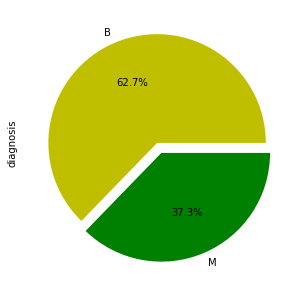

In [11]:
#Untuk melihat proporsi dari variabel diagnosa
explode = (0, 0.1)
color = ('y', 'g')

print('Jumlah B = Benign dan M = Malignant :\n', df_cancer['diagnosis'].value_counts())
df_cancer['diagnosis'].value_counts().plot.pie(autopct="%1.1f%%", figsize=(10,5), explode = explode, colors = color)

***Dapat dilihat dari diagram pie diatas bahwa cancer yang jinak lebih banyak dari pada cancer yang ganas dengan perbandingan cancer jinak 62,7% yaitu 357 data, sedangkan cancer ganas 37,7% yaitu 212 data. Tetapi data ini menjadi sedikit tidak seimbang karena cancer yang jinak lebih banyak 25.4% yaitu 145 data.***

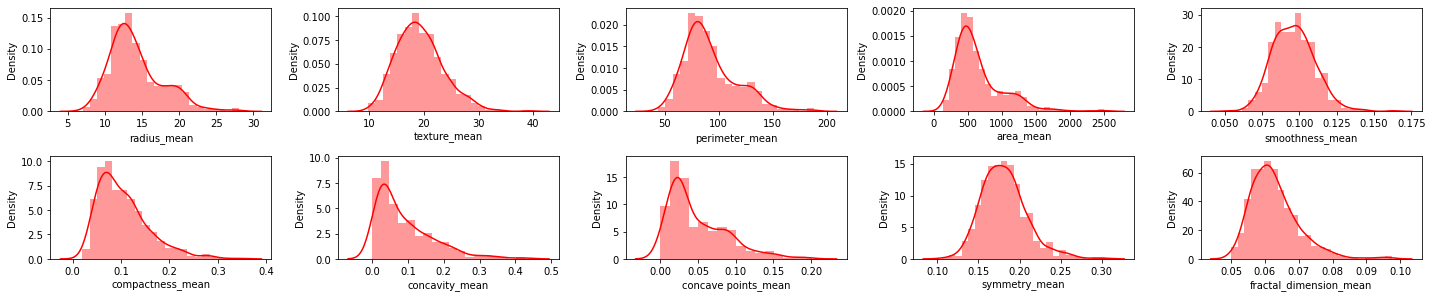

In [12]:
plt.figure(figsize=(20, 12))
for i in range(0, len(mean_grup)):
  plt.subplot(6, 5, i+1)
  sns.distplot(df_cancer[mean_grup[i]], color='r')
  plt.tight_layout()

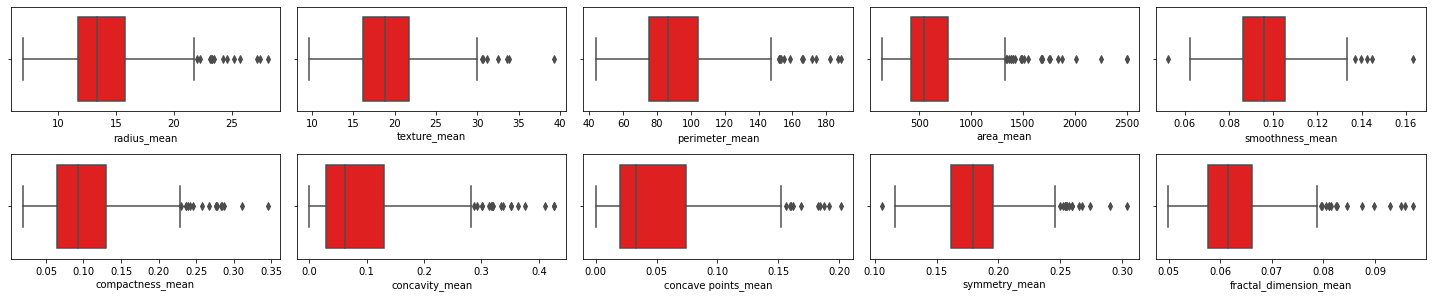

In [13]:
plt.figure(figsize=(20, 12))
for i in range(0, len(mean_grup)):
  plt.subplot(6, 5, i+1)
  sns.boxplot(df_cancer[mean_grup[i]], color='r')
  plt.tight_layout()

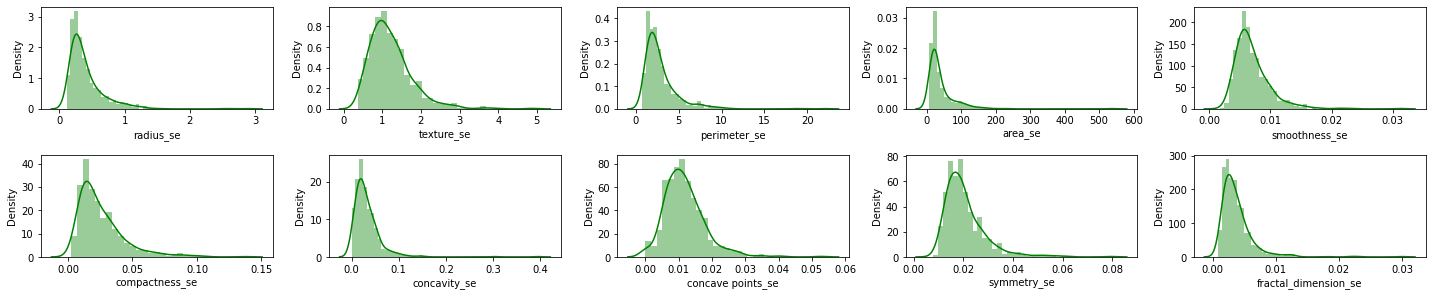

In [14]:
plt.figure(figsize=(20, 12))
for i in range(0, len(se_grup)):
  plt.subplot(6, 5, i+1)
  sns.distplot(df_cancer[se_grup[i]], color='g')
  plt.tight_layout()

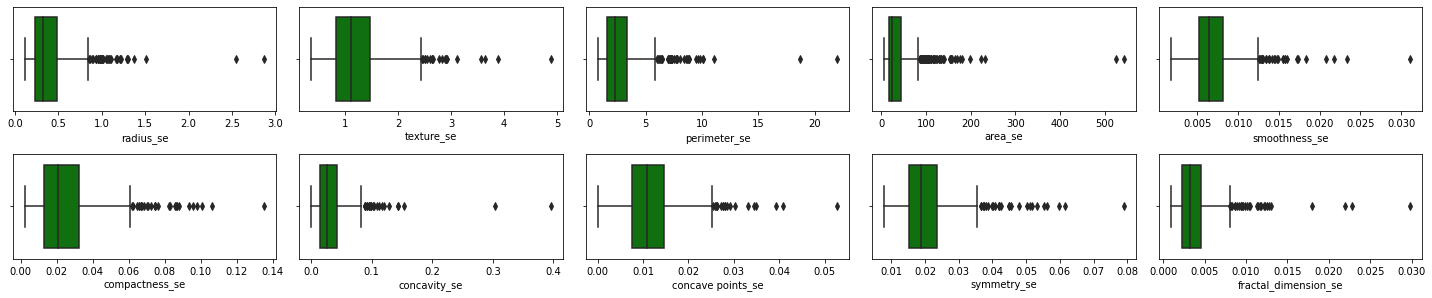

In [15]:
plt.figure(figsize=(20, 12))
for i in range(0, len(se_grup)):
  plt.subplot(6, 5, i+1)
  sns.boxplot(df_cancer[se_grup[i]], color='g')
  plt.tight_layout()

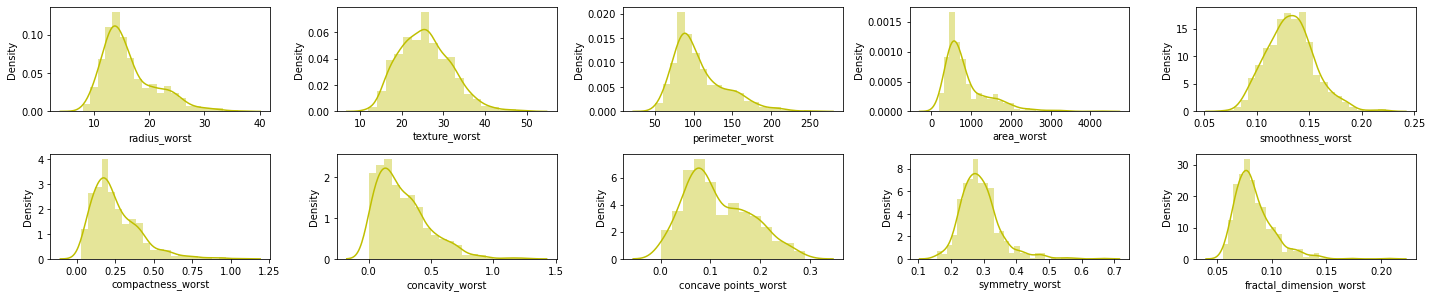

In [16]:
plt.figure(figsize=(20, 12))
for i in range(0, len(worst_grup)):
  plt.subplot(6, 5, i+1)
  sns.distplot(df_cancer[worst_grup[i]], color='y')
  plt.tight_layout()

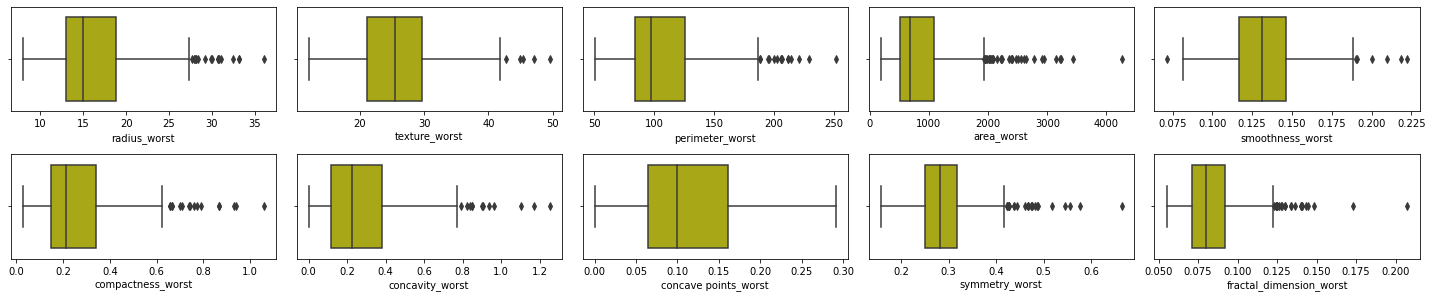

In [17]:
plt.figure(figsize=(20, 12))
for i in range(0, len(worst_grup)):
  plt.subplot(6, 5, i+1)
  sns.boxplot(df_cancer[worst_grup[i]], color='y')
  plt.tight_layout()

**Terdapat outlier pada data yang digunakan, hampir semua fitur terdapat outlier. Karena outlier datanya hanya sedikit, maka akan dibiarkan saja. Bisa dilihat juga data menghasilkan skew positif.** 

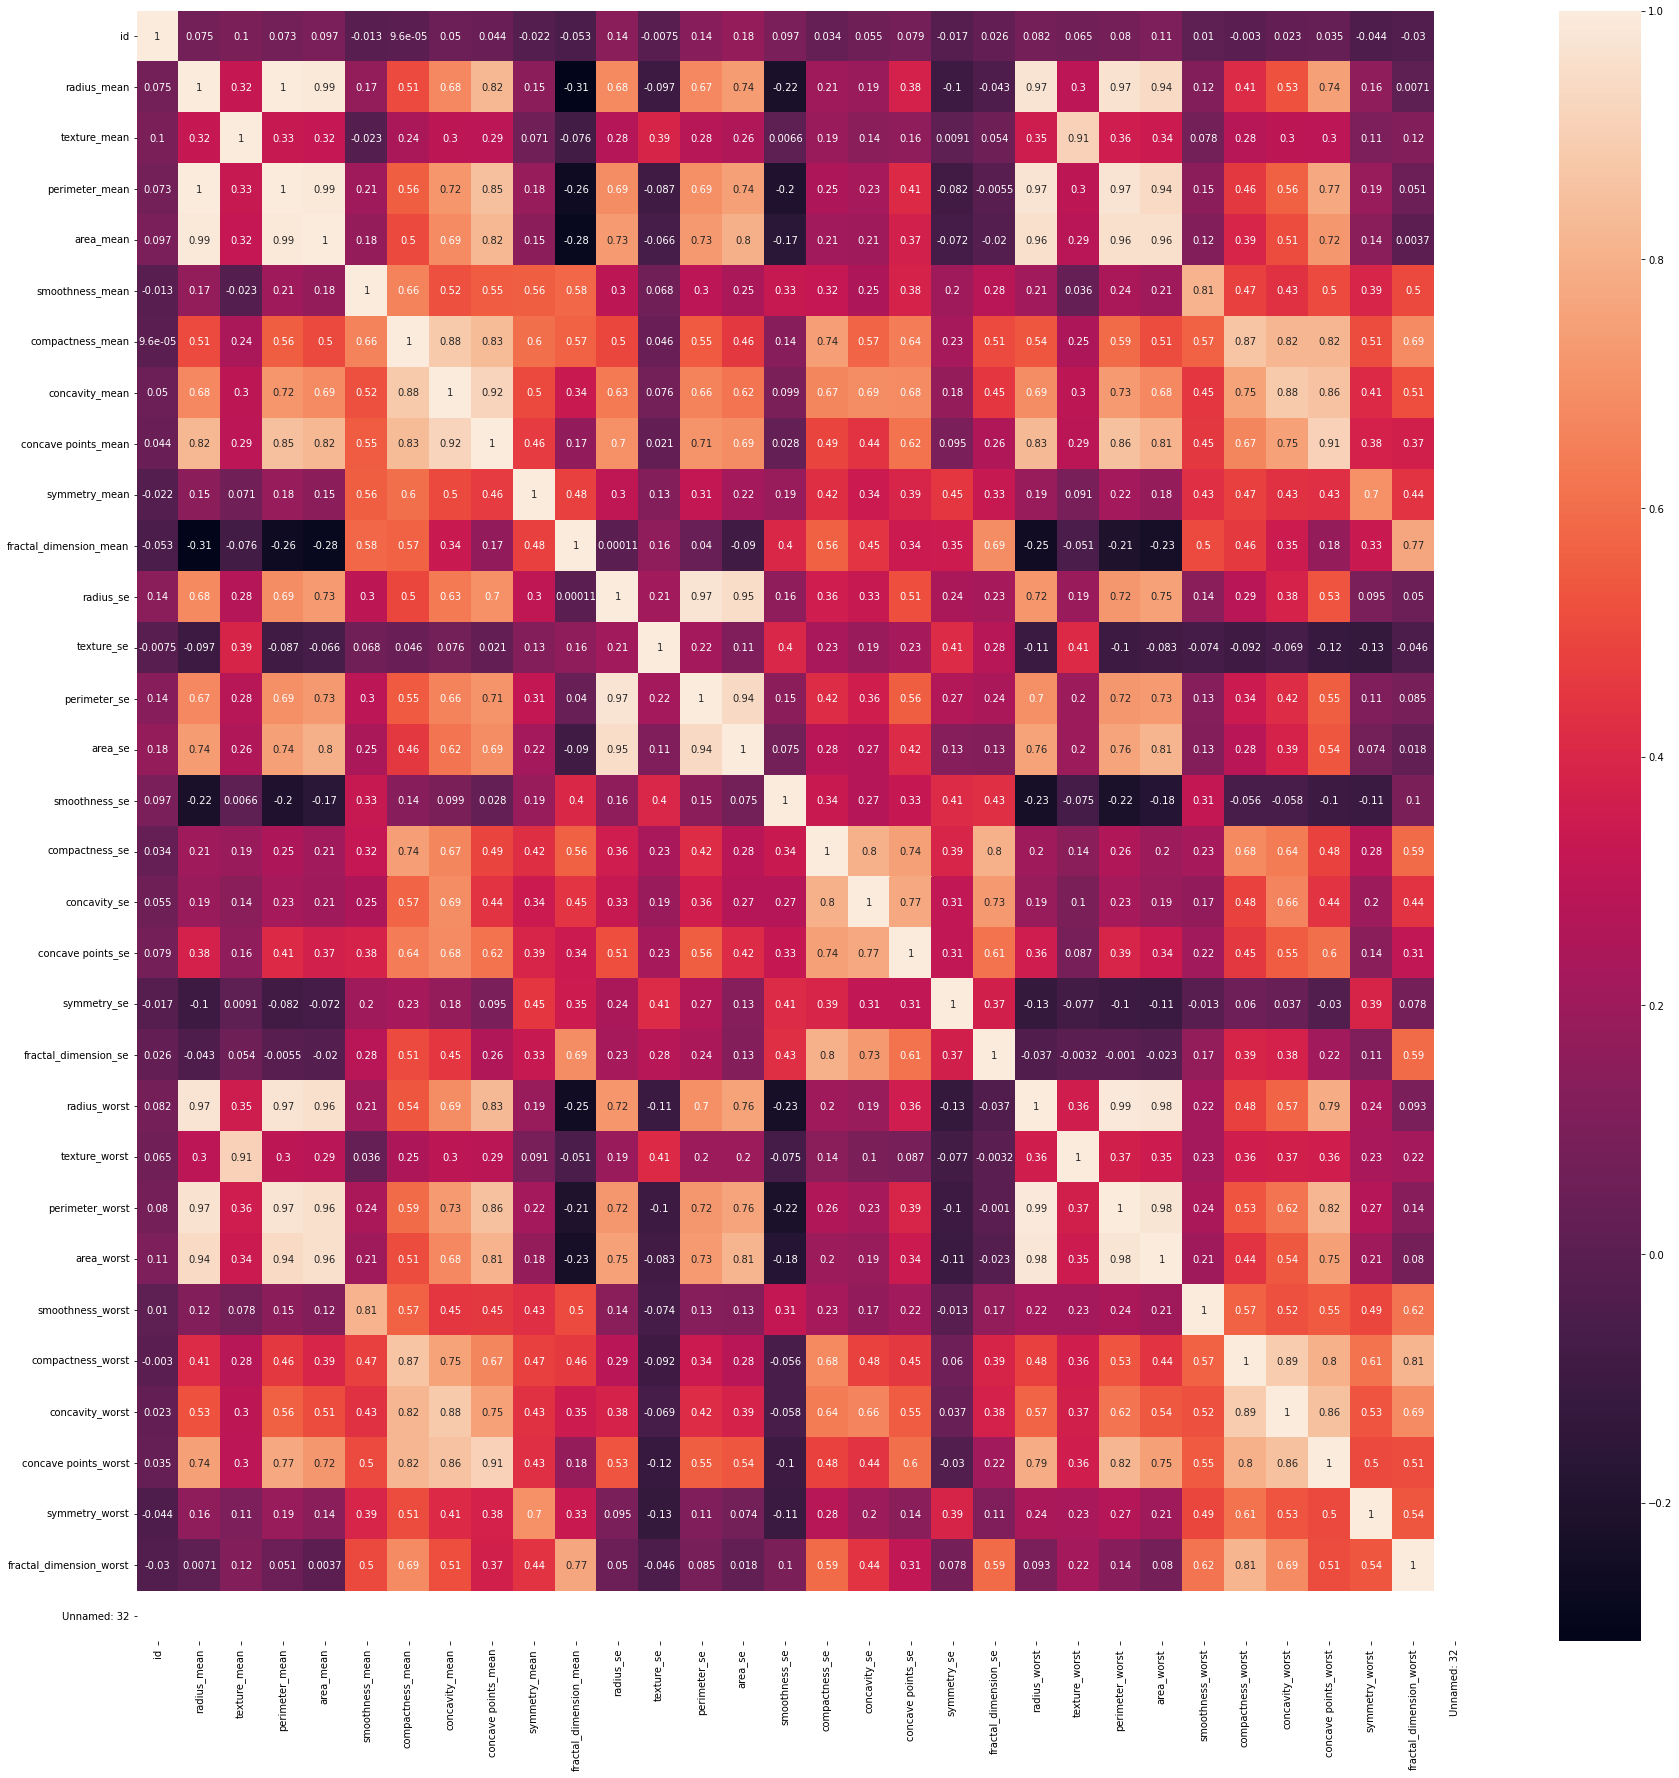

In [18]:
korr = df_cancer.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(korr, annot=True)

**Heatmap diatas menunjukan gambaran kolerasi dari setiap fitur yang ada pada data. Dapat dilihat bahwa cukup banyak fitur yang memiliki korelasi tinggi terhadap fitur yang lainya. Fitur "id" dan "Unnamed: 32" sama sekali tidak memiliki kolerasi yang baik. Jadi akan dihilangkan dan tidak digunakan.**

##Data Preprocessing

In [19]:
#Menghapus kolom id dan Unnamed: 32 karena tidak digunakan

df_cancer.drop(["Unnamed: 32"], axis=1, inplace=True)
df_cancer.drop(["id"], axis=1, inplace=True)

## LabelEncoder

In [20]:
#Merubah label dari kolom diagnosa B dan M menjadi 1 dan 0.
le = LabelEncoder()

df_cancer['diagnosis'] = le.fit_transform(df_cancer['diagnosis'])

## MinMaxScaler

In [21]:
mx = MinMaxScaler()

In [22]:
df_cancer['radius_mean'] = mx.fit_transform(df_cancer[['radius_mean']])
df_cancer['texture_mean'] = mx.fit_transform(df_cancer[['texture_mean']])
df_cancer['perimeter_mean'] = mx.fit_transform(df_cancer[['perimeter_mean']])
df_cancer['area_mean'] = mx.fit_transform(df_cancer[['area_mean']])

df_cancer['radius_se'] = mx.fit_transform(df_cancer[['radius_se']])
df_cancer['texture_se'] = mx.fit_transform(df_cancer[['texture_se']])
df_cancer['perimeter_se'] = mx.fit_transform(df_cancer[['perimeter_se']])
df_cancer['area_se'] = mx.fit_transform(df_cancer[['area_se']])

df_cancer['radius_worst'] = mx.fit_transform(df_cancer[['radius_worst']])
df_cancer['texture_worst'] = mx.fit_transform(df_cancer[['texture_worst']])
df_cancer['perimeter_worst'] = mx.fit_transform(df_cancer[['perimeter_worst']])
df_cancer['area_worst'] = mx.fit_transform(df_cancer[['area_worst']])

In [23]:
df_cancer.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
342,0,0.193052,0.177545,0.191417,0.097731,0.10330,0.09097,0.05397,0.03341,0.1776,0.06907,0.017599,0.102170,0.028177,0.007467,0.007416,0.01877,0.02758,0.010100,0.02348,0.002917,0.141942,0.210021,0.146173,0.062623,0.1418,0.22100,0.22990,0.10750,0.3301,0.09080
221,0,0.311373,0.141698,0.309585,0.177222,0.10510,0.11920,0.07860,0.04451,0.1962,0.06303,0.052653,0.030476,0.059087,0.026575,0.005851,0.02314,0.02544,0.008360,0.01842,0.002918,0.250800,0.136194,0.252453,0.123230,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
182,1,0.412656,0.358471,0.396724,0.264305,0.09597,0.08799,0.06593,0.05189,0.1618,0.05549,0.093572,0.174549,0.077699,0.063837,0.004626,0.02263,0.01954,0.009767,0.01547,0.002430,0.433298,0.554371,0.392898,0.266368,0.1414,0.35470,0.29020,0.15410,0.3437,0.08631
234,0,0.122391,0.209672,0.113468,0.057731,0.08464,0.04087,0.01652,0.01667,0.1551,0.06403,0.037552,0.103850,0.021580,0.010904,0.011640,0.01040,0.01186,0.009623,0.02383,0.003540,0.091782,0.190299,0.076348,0.037038,0.1504,0.09515,0.07161,0.07222,0.2757,0.08178
559,0,0.214350,0.480893,0.212356,0.110286,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.046098,0.562191,0.055553,0.018991,0.008200,0.02982,0.05738,0.012670,0.01488,0.004738,0.161864,0.670043,0.158723,0.071028,0.1298,0.25170,0.36300,0.09653,0.2112,0.08732


# Modelling

## Split Data

In [24]:
X = df_cancer.drop(columns = ["diagnosis"])
y = df_cancer['diagnosis'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

**Dataset dibagi dengan porsi pembagian Train = 80% dan Test = 20%**

In [42]:
y_train.shape

(455,)

In [40]:
y_test.shape

(114,)

## Decision Tree

In [26]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
dt_model_pred = dt_model.predict(X_test)

### Confusion Matrix

Confusion Matrix:
 [[69  3]
 [ 5 37]]


Text(0.5, 15.0, 'Predicted Label')

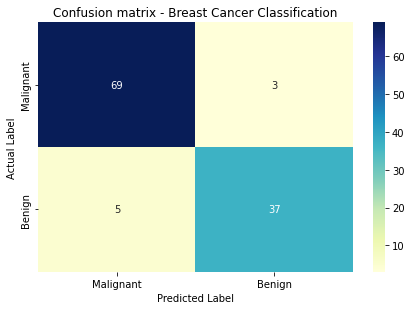

In [28]:
dt_model_cnf_matrix = metrics.confusion_matrix(y_test, dt_model_pred)
print('Confusion Matrix:\n', dt_model_cnf_matrix)

kelas=['Malignant','Benign']
fig, ax = plt.subplots()

#Heatmap
sns.heatmap(pd.DataFrame(dt_model_cnf_matrix), annot=True, cmap='YlGnBu', fmt='g', xticklabels=kelas, yticklabels=kelas)
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion matrix - Breast Cancer Classification', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [29]:
# Menghitung Accuracy, Precision, dan Recall

print("Accuracy :", metrics.accuracy_score(y_test, dt_model_pred))
print("Precision :", metrics.precision_score(y_test, dt_model_pred))
print("Recall :", metrics.recall_score(y_test, dt_model_pred))

Accuracy : 0.9298245614035088
Precision : 0.925
Recall : 0.8809523809523809


## Support Vector Machine (SVM)

In [30]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [31]:
svm_model_pred = svm_model.predict(X_test)

### Confusion Matrix

Confusion Matrix:
 [[72  0]
 [ 4 38]]


Text(0.5, 15.0, 'Predicted Label')

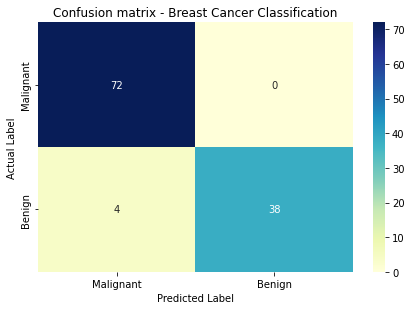

In [32]:
#Confusion Matrix
dt_model_cnf_matrix = metrics.confusion_matrix(y_test, svm_model_pred)
print('Confusion Matrix:\n', dt_model_cnf_matrix)

kelas=['Malignant','Benign']
fig, ax = plt.subplots()

#Heatmap
sns.heatmap(pd.DataFrame(dt_model_cnf_matrix), annot=True, cmap='YlGnBu', fmt='g', xticklabels=kelas, yticklabels=kelas)
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion matrix - Breast Cancer Classification', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [33]:
# Menghitung Accuracy, Precision, dan Recall

print("Accuracy :", metrics.accuracy_score(y_test, svm_model_pred))
print("Precision :", metrics.precision_score(y_test, svm_model_pred))
print("Recall :", metrics.recall_score(y_test, svm_model_pred))

Accuracy : 0.9649122807017544
Precision : 1.0
Recall : 0.9047619047619048


**Kesimpulan:**

Dari percobaan diatas bahwa didapatkan dari hasil evaluasi algoritma Decision Tree (DT) dan Support Vector Machine (SVM) bahwa algoritma SVM mendapatkan nilai yang lebih baik daripada algoritma DT. Dimana pembagian datanya adalah 80% data train dan 20% data test, dengan masing-masing algoritma menggunakan default dari aturannya.